## Final-Test : Python

### Tio Rahaditya Luthfitama

[dataset](https://drive.google.com/file/d/1K6OMDYu6yRdUO65Le1NbRBTNFPsbAX6s/view?usp=sharing)

* * *

###    1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

###    2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set(style='darkgrid')

###    3. Import loan_data.csv. Identifikasi tipe data dari masing-masing variable. Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


###        4. Lakukan pengecekan missing data dan duplicated-row. Jika ada, sebutkan kolom apa yang ada missing data. Apakah ada duplicated-row?

In [7]:
df.shape == df.drop_duplicates().shape

#True menunjukkan shape dari data awal dengan duplicate masih sama (tidak ada duplikasi)

True

In [8]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

###    5. Lakukan pengecekan variabel target. Ada berapa kategori pada variable target? Berapa proporsinya? Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

In [9]:
y = df.loc[:,df.columns == 'credit.policy']

In [10]:
len(y['credit.policy'].unique())

2

In [11]:
viz_y = y['credit.policy'].value_counts()

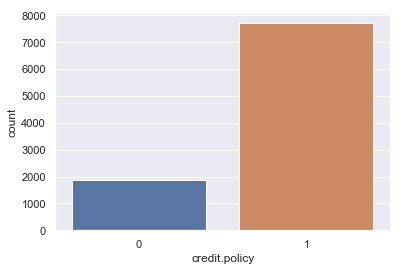

In [12]:
sns.countplot(df['credit.policy'])

###    6. Berapa variansi (ragam) nilai installment?

In [13]:
print('Hasil Variansi pada installment: {}'.format(round(df.installment.var(),2)))

Hasil Variansi pada installment: 42878.52


###    7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [14]:
from scipy.stats import iqr

In [15]:
print('IQR yang dihasilkan: {}'.format(iqr(df.installment)))

IQR yang dihasilkan: 268.99249999999995


###    8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [16]:
df.groupby('purpose')['installment'].max()

purpose
all_other             916.95
credit_card           922.42
debt_consolidation    940.14
educational           861.88
home_improvement      902.06
major_purchase        898.55
small_business        926.83
Name: installment, dtype: float64

###    9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman. Ada berapa kategori pada variable tersebut? Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [17]:
print('Jumlah kategori pada "Purpose": {}'.format(len(df.purpose.value_counts())))

Jumlah kategori pada "Purpose": 7


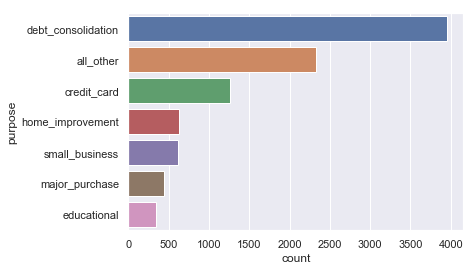

In [18]:
viz = sns.countplot(y = 'purpose',
              data = df,
              order = df['purpose'].value_counts().index)

###    10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

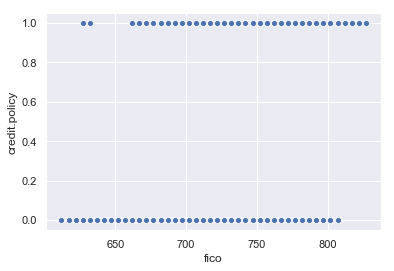

In [19]:
ax = sns.scatterplot(x="fico", y="credit.policy", data=df)

Setelah melihat visualisasi dari kolom `fico` dengan kolom `credit.policy`, data tersebut cocok menggunakan `Logistic Regression (LR)`. LR sangat baik dengan untuk kondisi target 0,1.

###    11. Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

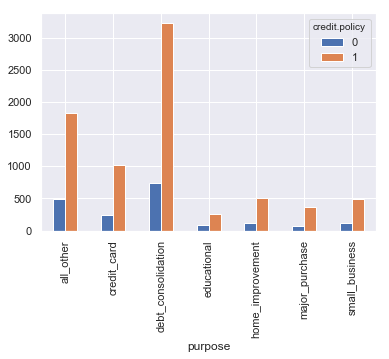

In [20]:
ct = pd.crosstab(df.purpose, df['credit.policy'])
ct.plot.bar(stacked=False)

    Tidak, saya tidak setuju apabila variabel `purpose` digunakan sebagai target prediksi.Terlihat bahwasanya ada kesenjangan / imbalance pada setiap kategorinya.Sehingga perlu dilakukan smote pada setiap kategorinya (contohnya pada debt_consolidation yang jaraknya terlalu jauh).

###    12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [21]:
print('rata-rata int.rate adalah: {}'.format(round(df.groupby(df.purpose)['int.rate'].mean()['credit_card'],2)))

rata-rata int.rate adalah: 0.12


###    13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [22]:
#len(df[df['installment'] > 200 & (df['purpose'] == "education")])
print('jumlah kasus pinjaman dengan syarat diatas: {}'.format(len(df[(df.installment > 200) & (df['purpose'] == "educational")])))

jumlah kasus pinjaman dengan syarat diatas: 137


###    14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [23]:
def filter_credit_card(df):
    loans3 = df[df['purpose'] == 'credit_card']
    return loans3.head()

In [24]:
filter_credit_card(df)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


###    15. Siapkan data untuk pemodelan. Ubah data kategorik menjadi dummy variabel. Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [25]:
dummy = pd.get_dummies(df['purpose'], drop_first=True)

In [26]:
dummy.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [27]:
df.drop('purpose',axis=1,inplace=True)

In [28]:
final_data = pd.concat([df,dummy],axis=1)

In [29]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


###    16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = final_data.drop(columns=['credit.policy'])
y = final_data['credit.policy']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

###    17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###    18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [34]:
predictions = dtree.predict(X_test)

### 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(predictions, y_test)
print(cm)

[[ 537   16]
 [  14 2307]]


###    20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(predictions, y_test))

total = sum(sum(cm))

sens = cm[0,0] / (cm[0,0]+cm[0,1])
print('Sensitivity: ',sens)
spec = cm[1,1] / (cm[1,0]+cm[1,1])
print('Specificity: ',spec)

Accuracy:  0.9895615866388309
Sensitivity:  0.9710669077757685
Specificity:  0.993968117190866
